# Real Data

## Data cleaning

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import joblib
import random
from tqdm import tqdm

In [2]:
all_data = joblib.load('../inputs/pre-processed/all_data_clean.pkl')

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569003 entries, 0 to 23459
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            569003 non-null  datetime64[ns]
 1   FPSO_choke           568335 non-null  float64       
 2   WELL01_ICV_BottomDP  91560 non-null   float64       
 3   WELL01_ICV_TopDP     100267 non-null  float64       
 4   WELL01_MA2_T         104716 non-null  float64       
 5   WELL01_MA4_P         565897 non-null  float64       
 6   WELL01_MA4_T         97142 non-null   float64       
 7   WELL01_MA_36         327327 non-null  float64       
 8   WELL01_MA_37         197936 non-null  float64       
 9   WELL01_TubingDP      113493 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 47.8 MB


In [4]:
all_data.head()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
0,2018-01-01 00:01:30,0.000000,NaN,NaN,86.09845,643.5891,86.11267,NaN,NaN,NaN
1,2018-01-01 00:02:00,0.000000,NaN,NaN,NaN,643.5891,NaN,NaN,NaN,NaN
2,2018-01-01 01:51:00,0.000000,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
3,2018-01-01 01:51:30,0.262501,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
4,2018-01-01 01:52:30,0.262501,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN


In [5]:
all_data.tail()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
23455,2019-08-21 11:09:39.272003,0.0,NaN,NaN,NaN,596.5763,NaN,76.23967,NaN,NaN
23456,2019-08-21 19:04:00.048004,0.0,NaN,NaN,NaN,596.4357,NaN,NaN,231.1610,NaN
23457,2019-08-22 02:56:30.068008,0.0,NaN,NaN,NaN,596.3318,NaN,NaN,231.4965,NaN
23458,2019-08-22 10:49:00.078003,0.0,NaN,NaN,NaN,596.2120,NaN,NaN,NaN,NaN
23459,2019-08-22 18:41:00.688004,0.0,NaN,NaN,NaN,596.1424,NaN,NaN,NaN,NaN


In [6]:
all_data.isna().sum()

timestamp                   0
FPSO_choke                668
WELL01_ICV_BottomDP    477443
WELL01_ICV_TopDP       468736
WELL01_MA2_T           464287
WELL01_MA4_P             3106
WELL01_MA4_T           471861
WELL01_MA_36           241676
WELL01_MA_37           371067
WELL01_TubingDP        455510
dtype: int64

### Visualizing missing values

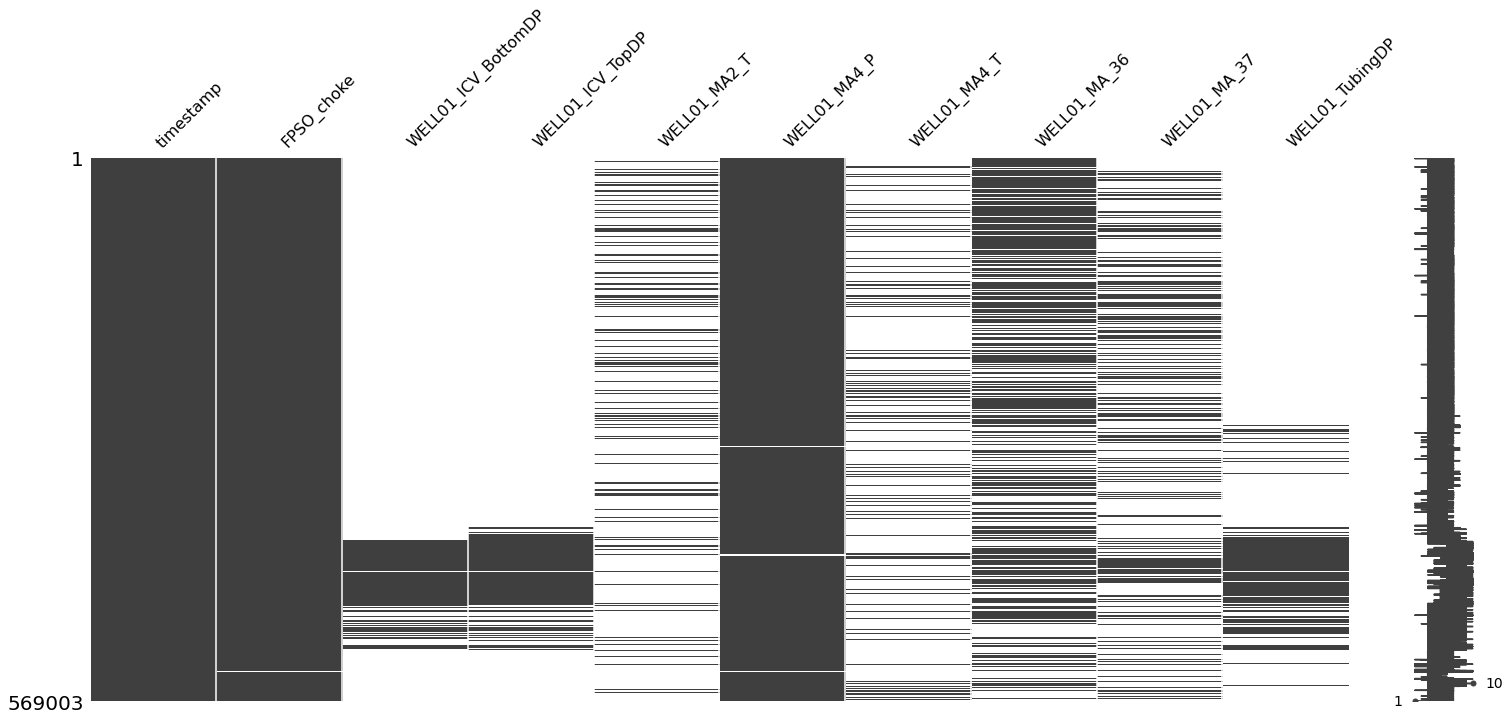

In [7]:
msno.matrix(all_data);

## Selecting variables and timestamps used in simulation model
- Data until 2018-08-24 will be set apart as test data, since this is the final period of labeled ICV action tests.

In [8]:
df = all_data.loc[all_data['timestamp'] >= '2018-08-25', ['timestamp', 'WELL01_MA4_P', 'WELL01_MA_37', 'WELL01_MA4_T', 'WELL01_MA2_T', 'WELL01_MA_36']]

In [9]:
df.head()

,timestamp,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
114317,2018-08-25 00:00:00.051010,590.3372,160.7055,NaN,NaN,75.90591
114318,2018-08-25 00:00:30.067001,590.3438,NaN,NaN,NaN,75.90591
114319,2018-08-25 00:02:00.069000,590.3525,163.3896,NaN,NaN,75.90591
114320,2018-08-25 00:02:30.070007,590.3479,161.0410,NaN,NaN,75.90591
114321,2018-08-25 00:03:00.071014,590.3412,160.7055,NaN,88.66713,75.85823


In [10]:
df.tail()

,timestamp,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
23455,2019-08-21 11:09:39.272003,596.5763,NaN,NaN,NaN,76.23967
23456,2019-08-21 19:04:00.048004,596.4357,231.1610,NaN,NaN,NaN
23457,2019-08-22 02:56:30.068008,596.3318,231.4965,NaN,NaN,NaN
23458,2019-08-22 10:49:00.078003,596.2120,NaN,NaN,NaN,NaN
23459,2019-08-22 18:41:00.688004,596.1424,NaN,NaN,NaN,NaN


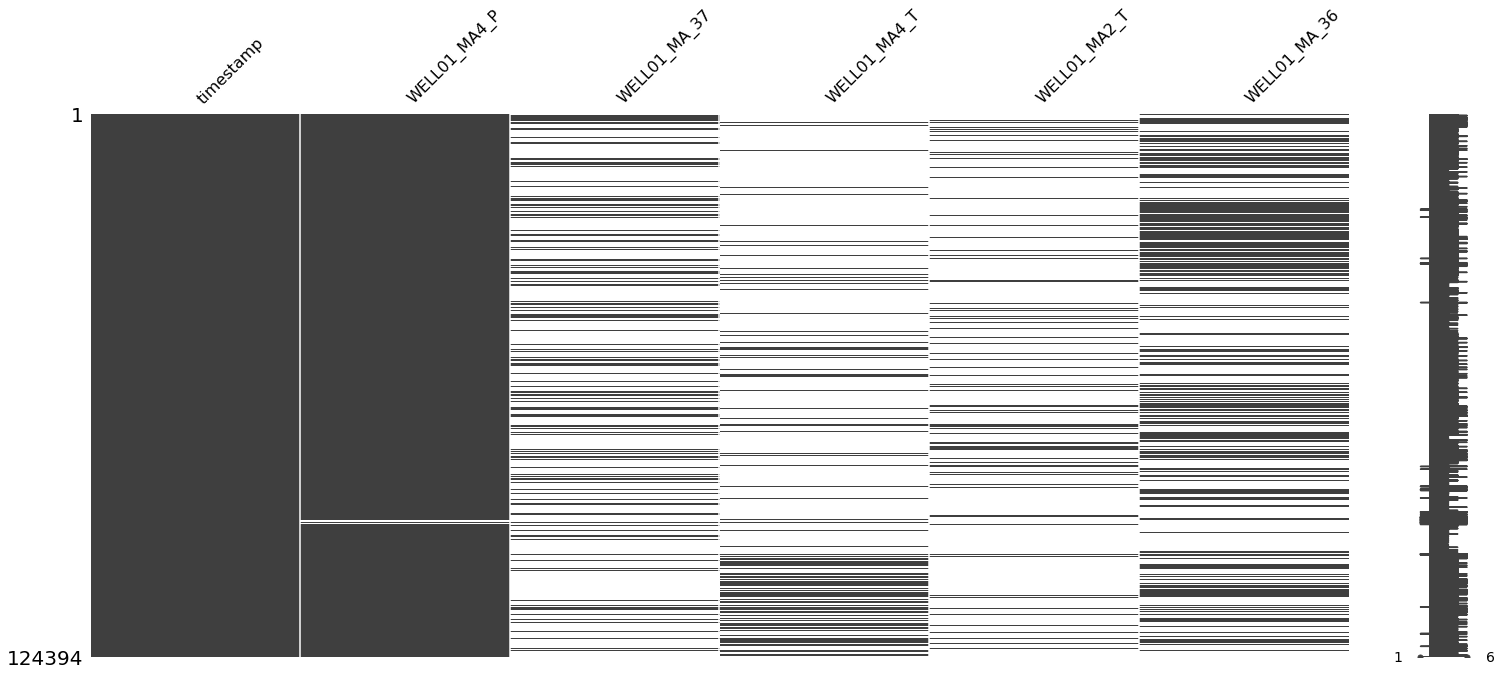

In [11]:
msno.matrix(df);

## Filling data gaps
### Filling criteria:
- First, fill na values with the precedent value, assuming that the physical variable remained unchanged
- The remaining na values will be discarded

In [12]:
df.fillna(method='ffill', inplace=True)

In [13]:
df.head()

,timestamp,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
114317,2018-08-25 00:00:00.051010,590.3372,160.7055,NaN,NaN,75.90591
114318,2018-08-25 00:00:30.067001,590.3438,160.7055,NaN,NaN,75.90591
114319,2018-08-25 00:02:00.069000,590.3525,163.3896,NaN,NaN,75.90591
114320,2018-08-25 00:02:30.070007,590.3479,161.0410,NaN,NaN,75.90591
114321,2018-08-25 00:03:00.071014,590.3412,160.7055,NaN,88.66713,75.85823


In [14]:
df.tail()

,timestamp,WELL01_MA4_P,WELL01_MA_37,WELL01_MA4_T,WELL01_MA2_T,WELL01_MA_36
23455,2019-08-21 11:09:39.272003,596.5763,231.8320,88.45481,88.33851,76.23967
23456,2019-08-21 19:04:00.048004,596.4357,231.1610,88.45481,88.33851,76.23967
23457,2019-08-22 02:56:30.068008,596.3318,231.4965,88.45481,88.33851,76.23967
23458,2019-08-22 10:49:00.078003,596.2120,231.4965,88.45481,88.33851,76.23967
23459,2019-08-22 18:41:00.688004,596.1424,231.4965,88.45481,88.33851,76.23967


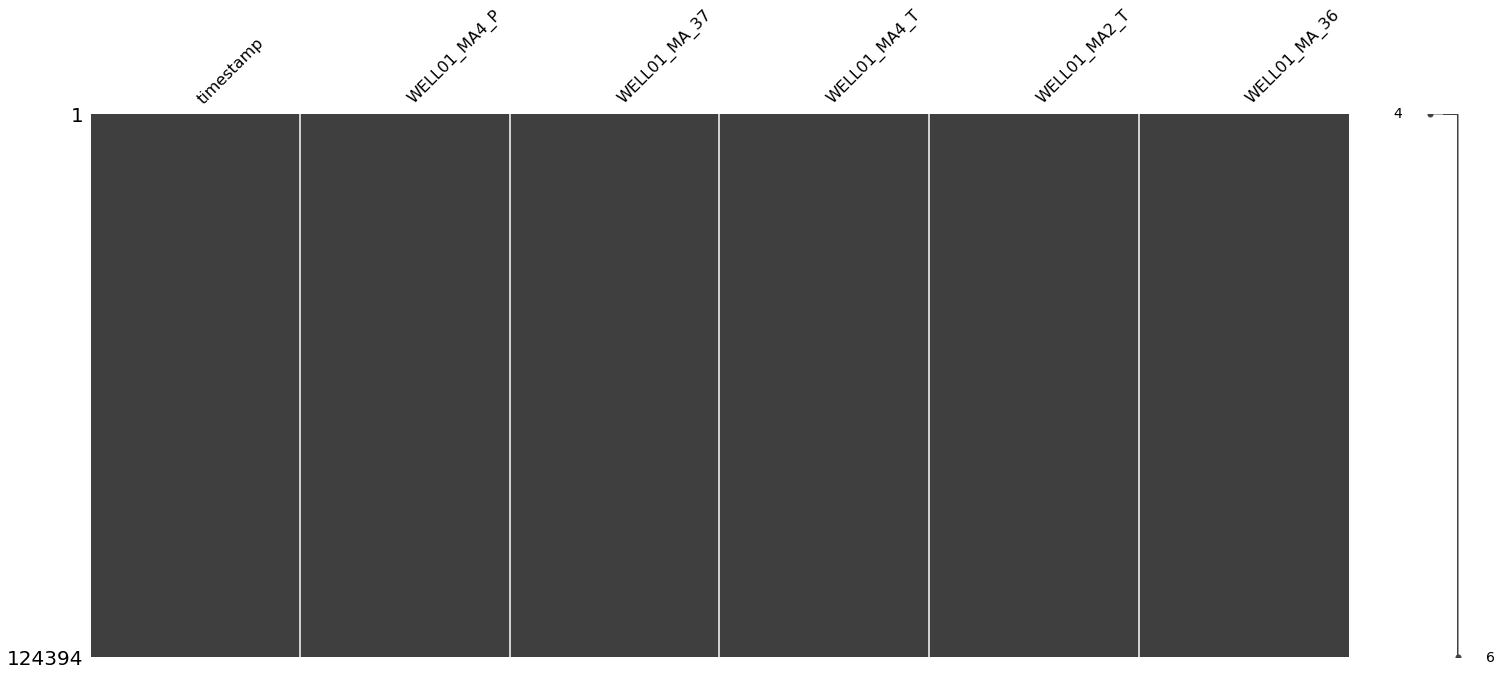

In [15]:
msno.matrix(df);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124394 entries, 114317 to 23459
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   timestamp     124394 non-null  datetime64[ns]
 1   WELL01_MA4_P  124394 non-null  float64       
 2   WELL01_MA_37  124394 non-null  float64       
 3   WELL01_MA4_T  124256 non-null  float64       
 4   WELL01_MA2_T  124390 non-null  float64       
 5   WELL01_MA_36  124394 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.6 MB


In [17]:
df['WELL01_MA4_T'] = df['WELL01_MA4_T'].fillna(df['WELL01_MA4_T'].median())
df['WELL01_MA2_T'] = df['WELL01_MA2_T'].fillna(df['WELL01_MA2_T'].median())

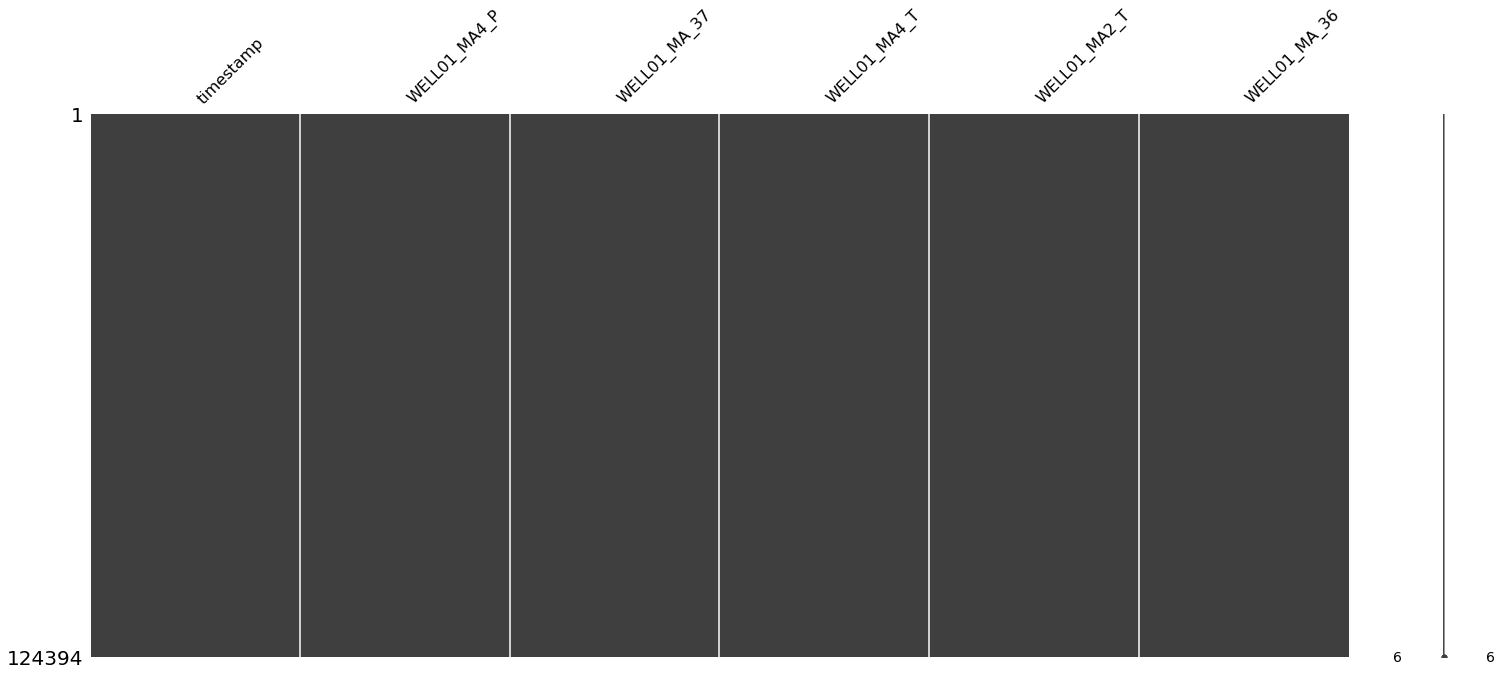

In [18]:
msno.matrix(df);

## Converting the variables for the same boundary conditions of the simulation

In [19]:
df['P_bottom'] = df['WELL01_MA4_P']

In [20]:
df['T_WH'] = df['WELL01_MA_36']

In [21]:
# Without Noise from EDA, only deltas
df['P_Z0'] = df.apply(lambda row: row['P_bottom']+ 100  + 100, axis=1) #random.normalvariate(100, 6.314231)
df['P_Z1'] = df.apply(lambda row: row['P_bottom']+ 70  + 70, axis=1) #random.normalvariate(70, 6.314231), axis=1)
df['P_WH'] = df['P_bottom'] #+ random.normalvariate(0, 3.359756), axis=1)
df['T_Z0'] = df['WELL01_MA4_T'] #+ random.normalvariate(0, 1.554087), axis=1)
df['T_Z1'] = df['WELL01_MA2_T'] #+ random.normalvariate(0, 1.334842), axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124394 entries, 114317 to 23459
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   timestamp     124394 non-null  datetime64[ns]
 1   WELL01_MA4_P  124394 non-null  float64       
 2   WELL01_MA_37  124394 non-null  float64       
 3   WELL01_MA4_T  124394 non-null  float64       
 4   WELL01_MA2_T  124394 non-null  float64       
 5   WELL01_MA_36  124394 non-null  float64       
 6   P_bottom      124394 non-null  float64       
 7   T_WH          124394 non-null  float64       
 8   P_Z0          124394 non-null  float64       
 9   P_Z1          124394 non-null  float64       
 10  P_WH          124394 non-null  float64       
 11  T_Z0          124394 non-null  float64       
 12  T_Z1          124394 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 13.3 MB


In [23]:
df.columns

Index(['timestamp', 'WELL01_MA4_P', 'WELL01_MA_37', 'WELL01_MA4_T',
       'WELL01_MA2_T', 'WELL01_MA_36', 'P_bottom', 'T_WH', 'P_Z0', 'P_Z1',
       'P_WH', 'T_Z0', 'T_Z1'],
      dtype='object')

In [24]:
df.drop(columns=['WELL01_MA4_P', 'WELL01_MA_37', 'WELL01_MA4_T', 'WELL01_MA2_T', 'WELL01_MA_36'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124394 entries, 114317 to 23459
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  124394 non-null  datetime64[ns]
 1   P_bottom   124394 non-null  float64       
 2   T_WH       124394 non-null  float64       
 3   P_Z0       124394 non-null  float64       
 4   P_Z1       124394 non-null  float64       
 5   P_WH       124394 non-null  float64       
 6   T_Z0       124394 non-null  float64       
 7   T_Z1       124394 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 8.5 MB


In [26]:
df.columns

Index(['timestamp', 'P_bottom', 'T_WH', 'P_Z0', 'P_Z1', 'P_WH', 'T_Z0',
       'T_Z1'],
      dtype='object')

In [27]:
df['timestamp'].max()

Timestamp('2019-08-22 18:41:00.688004')

In [28]:
df['timestamp'].max() < pd.Timestamp('2019-08-23')

True

In [29]:
df_before = pd.DataFrame()
df_after = pd.DataFrame()
delay_min = pd.to_timedelta('12 hours')
delay_max = pd.to_timedelta('24 hours')

for i in tqdm(range(5_000)):
    # 1. Randomly choose the first row
    # The first sample's timestamp must be at least 24 hours before the second
    random_first_row = df[df['timestamp'] < pd.Timestamp('2019-08-21')].sample(1)

    # 2. Get the second row between 12h and 24h after the first
    start_time = random_first_row['timestamp'].iloc[0]
    random_second_row = df[(df['timestamp'] > start_time + delay_min) & (df['timestamp'] < start_time + delay_max)].sample(1)

        
    # 3. Append each row to its dataset
    df_before = pd.concat([df_before, random_first_row])
    df_after = pd.concat([df_after, random_second_row])

100%|██████████████████████████████████████| 5000/5000 [00:38<00:00, 131.01it/s]


In [30]:
df_before.reset_index(drop=True, inplace=True)
df_after.reset_index(drop=True, inplace=True)

In [31]:
df_before

,timestamp,P_bottom,T_WH,P_Z0,P_Z1,P_WH,T_Z0,T_Z1
0,2018-09-24 01:51:30.041016,585.0305,75.715190,785.0305,725.0305,585.0305,0.00000,88.69479
1,2018-09-19 14:39:30.048004,585.5805,75.762860,785.5805,725.5805,585.5805,88.22672,88.67108
2,2018-09-22 17:43:00.046005,585.1947,75.715190,785.1947,725.1947,585.1947,88.24015,88.69874
3,2019-05-04 18:49:30.052002,640.2908,3.480606,840.2908,780.2908,640.2908,84.37190,84.53745
4,2018-09-11 14:39:00.089004,586.5366,75.810550,786.5366,726.5366,586.5366,88.21777,88.66318
...,...,...,...,...,...,...,...,...
4995,2018-08-28 02:57:00.057007,589.5379,75.905910,789.5379,729.5379,589.5379,88.23120,88.61969
4996,2019-07-09 00:39:07.068008,583.9273,75.429110,783.9273,723.9273,583.9273,88.62888,88.70664
4997,2019-07-12 14:40:31.038010,588.4738,75.858230,788.4738,728.4738,588.4738,88.68683,88.86452
4998,2018-09-27 11:53:00.014008,584.4802,75.715190,784.4802,724.4802,584.4802,88.24911,88.69874


In [32]:
df_after

,timestamp,P_bottom,T_WH,P_Z0,P_Z1,P_WH,T_Z0,T_Z1
0,2018-09-24 15:48:30.065002,584.9432,75.667510,784.9432,724.9432,584.9432,88.24463,88.68689
1,2018-09-20 11:50:00.060013,585.4557,75.715190,785.4557,725.4557,585.4557,88.23120,88.69083
2,2018-09-23 09:54:00.019012,585.1704,75.715190,785.1704,725.1704,585.1704,88.23567,88.69874
3,2019-05-05 17:59:00.123001,640.4044,3.528286,840.4044,780.4044,640.4044,84.33929,84.48786
4,2018-09-12 08:10:30.116012,586.2921,75.762860,786.2921,726.2921,586.2921,88.22224,88.66713
...,...,...,...,...,...,...,...,...
4995,2018-08-28 22:06:00.081009,589.2014,75.905910,789.2014,729.2014,589.2014,88.22672,88.62364
4996,2019-07-09 15:03:02.220001,583.7164,75.381440,783.7164,723.7164,583.7164,88.61104,88.71454
4997,2019-07-13 10:53:32.434005,583.2991,75.429110,783.2991,723.2991,583.2991,88.60658,88.74614
4998,2018-09-28 03:57:00.038010,550.7610,76.096620,750.7610,690.7610,550.7610,89.32198,89.33263


In [33]:
df_sample = pd.merge(df_before, df_after, suffixes=['_before', '_after'], left_index=True, right_index=True)

In [34]:
df_sample

,timestamp_before,P_bottom_before,T_WH_before,P_Z0_before,P_Z1_before,P_WH_before,T_Z0_before,T_Z1_before,timestamp_after,P_bottom_after,T_WH_after,P_Z0_after,P_Z1_after,P_WH_after,T_Z0_after,T_Z1_after
0,2018-09-24 01:51:30.041016,585.0305,75.715190,785.0305,725.0305,585.0305,0.00000,88.69479,2018-09-24 15:48:30.065002,584.9432,75.667510,784.9432,724.9432,584.9432,88.24463,88.68689
1,2018-09-19 14:39:30.048004,585.5805,75.762860,785.5805,725.5805,585.5805,88.22672,88.67108,2018-09-20 11:50:00.060013,585.4557,75.715190,785.4557,725.4557,585.4557,88.23120,88.69083
2,2018-09-22 17:43:00.046005,585.1947,75.715190,785.1947,725.1947,585.1947,88.24015,88.69874,2018-09-23 09:54:00.019012,585.1704,75.715190,785.1704,725.1704,585.1704,88.23567,88.69874
3,2019-05-04 18:49:30.052002,640.2908,3.480606,840.2908,780.2908,640.2908,84.37190,84.53745,2019-05-05 17:59:00.123001,640.4044,3.528286,840.4044,780.4044,640.4044,84.33929,84.48786
4,2018-09-11 14:39:00.089004,586.5366,75.810550,786.5366,726.5366,586.5366,88.21777,88.66318,2018-09-12 08:10:30.116012,586.2921,75.762860,786.2921,726.2921,586.2921,88.22224,88.66713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2018-08-28 02:57:00.057007,589.5379,75.905910,789.5379,729.5379,589.5379,88.23120,88.61969,2018-08-28 22:06:00.081009,589.2014,75.905910,789.2014,729.2014,589.2014,88.22672,88.62364
4996,2019-07-09 00:39:07.068008,583.9273,75.429110,783.9273,723.9273,583.9273,88.62888,88.70664,2019-07-09 15:03:02.220001,583.7164,75.381440,783.7164,723.7164,583.7164,88.61104,88.71454
4997,2019-07-12 14:40:31.038010,588.4738,75.858230,788.4738,728.4738,588.4738,88.68683,88.86452,2019-07-13 10:53:32.434005,583.2991,75.429110,783.2991,723.2991,583.2991,88.60658,88.74614
4998,2018-09-27 11:53:00.014008,584.4802,75.715190,784.4802,724.4802,584.4802,88.24911,88.69874,2018-09-28 03:57:00.038010,550.7610,76.096620,750.7610,690.7610,550.7610,89.32198,89.33263


In [35]:
df_sample.drop(columns=['timestamp_before', 'timestamp_after'], inplace=True)
df_sample

,P_bottom_before,T_WH_before,P_Z0_before,P_Z1_before,P_WH_before,T_Z0_before,T_Z1_before,P_bottom_after,T_WH_after,P_Z0_after,P_Z1_after,P_WH_after,T_Z0_after,T_Z1_after
0,585.0305,75.715190,785.0305,725.0305,585.0305,0.00000,88.69479,584.9432,75.667510,784.9432,724.9432,584.9432,88.24463,88.68689
1,585.5805,75.762860,785.5805,725.5805,585.5805,88.22672,88.67108,585.4557,75.715190,785.4557,725.4557,585.4557,88.23120,88.69083
2,585.1947,75.715190,785.1947,725.1947,585.1947,88.24015,88.69874,585.1704,75.715190,785.1704,725.1704,585.1704,88.23567,88.69874
3,640.2908,3.480606,840.2908,780.2908,640.2908,84.37190,84.53745,640.4044,3.528286,840.4044,780.4044,640.4044,84.33929,84.48786
4,586.5366,75.810550,786.5366,726.5366,586.5366,88.21777,88.66318,586.2921,75.762860,786.2921,726.2921,586.2921,88.22224,88.66713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,589.5379,75.905910,789.5379,729.5379,589.5379,88.23120,88.61969,589.2014,75.905910,789.2014,729.2014,589.2014,88.22672,88.62364
4996,583.9273,75.429110,783.9273,723.9273,583.9273,88.62888,88.70664,583.7164,75.381440,783.7164,723.7164,583.7164,88.61104,88.71454
4997,588.4738,75.858230,788.4738,728.4738,588.4738,88.68683,88.86452,583.2991,75.429110,783.2991,723.2991,583.2991,88.60658,88.74614
4998,584.4802,75.715190,784.4802,724.4802,584.4802,88.24911,88.69874,550.7610,76.096620,750.7610,690.7610,550.7610,89.32198,89.33263


In [36]:
df_sample['failure'] = False
df_sample

,P_bottom_before,T_WH_before,P_Z0_before,P_Z1_before,P_WH_before,T_Z0_before,T_Z1_before,P_bottom_after,T_WH_after,P_Z0_after,P_Z1_after,P_WH_after,T_Z0_after,T_Z1_after,failure
0,585.0305,75.715190,785.0305,725.0305,585.0305,0.00000,88.69479,584.9432,75.667510,784.9432,724.9432,584.9432,88.24463,88.68689,False
1,585.5805,75.762860,785.5805,725.5805,585.5805,88.22672,88.67108,585.4557,75.715190,785.4557,725.4557,585.4557,88.23120,88.69083,False
2,585.1947,75.715190,785.1947,725.1947,585.1947,88.24015,88.69874,585.1704,75.715190,785.1704,725.1704,585.1704,88.23567,88.69874,False
3,640.2908,3.480606,840.2908,780.2908,640.2908,84.37190,84.53745,640.4044,3.528286,840.4044,780.4044,640.4044,84.33929,84.48786,False
4,586.5366,75.810550,786.5366,726.5366,586.5366,88.21777,88.66318,586.2921,75.762860,786.2921,726.2921,586.2921,88.22224,88.66713,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,589.5379,75.905910,789.5379,729.5379,589.5379,88.23120,88.61969,589.2014,75.905910,789.2014,729.2014,589.2014,88.22672,88.62364,False
4996,583.9273,75.429110,783.9273,723.9273,583.9273,88.62888,88.70664,583.7164,75.381440,783.7164,723.7164,583.7164,88.61104,88.71454,False
4997,588.4738,75.858230,788.4738,728.4738,588.4738,88.68683,88.86452,583.2991,75.429110,783.2991,723.2991,583.2991,88.60658,88.74614,False
4998,584.4802,75.715190,784.4802,724.4802,584.4802,88.24911,88.69874,550.7610,76.096620,750.7610,690.7610,550.7610,89.32198,89.33263,False


# Synthetic data

In [37]:
df_synth = pd.read_csv('../outputs/synthetic_failure_data.csv', index_col=0)
df_synth

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,top_icv_status_before,top_icv_status_after,bottom_icv_status_before,bottom_icv_status_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,command_type,failure
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,True,True,True,False,784.543408,714.596127,71.206940,72.954653,Close_Bottom,True
1,823.407968,836.298427,785.214298,786.737540,114.380874,109.468553,85.859813,88.941707,90.356803,87.281548,True,True,False,True,733.144915,834.406636,82.471340,82.429775,Open_Bottom,False
2,783.162356,781.606394,727.905276,727.690796,224.554990,230.421390,89.138396,88.773388,89.711909,88.672596,True,True,True,True,786.286632,785.434586,72.559822,71.329930,No-action,False
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,True,True,True,False,784.875416,709.494408,71.972874,68.481609,Close_Bottom,True
4,845.024456,830.298714,778.727926,791.655508,105.516327,111.314215,85.680819,86.664650,89.330981,86.211135,True,True,False,False,726.617208,737.646014,81.582149,78.978201,No-action,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,True,False,True,True,783.550277,738.536140,70.566993,64.813454,Close_Top,True
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,False,True,True,True,763.311953,800.419377,68.210562,73.542945,Open_Top,True
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,True,True,True,True,790.285841,786.020107,73.289724,71.450532,Close_Bottom,True
9998,850.027606,845.226598,774.510375,793.817333,115.348739,110.382150,87.331351,89.311389,84.625393,85.116316,True,True,True,False,840.237675,739.133578,80.092350,78.105941,Close_Bottom,True


In [38]:
# Since we do not have information about the ICVs status neither about the command sent, the corresponding columns will be excluded from the synthetic failure data
df_sample_synth = df_synth.drop(columns=['top_icv_status_before', 'top_icv_status_after', 'bottom_icv_status_before', 'bottom_icv_status_after', 'command_type'])
df_sample_synth

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,784.543408,714.596127,71.206940,72.954653,True
1,823.407968,836.298427,785.214298,786.737540,114.380874,109.468553,85.859813,88.941707,90.356803,87.281548,733.144915,834.406636,82.471340,82.429775,False
2,783.162356,781.606394,727.905276,727.690796,224.554990,230.421390,89.138396,88.773388,89.711909,88.672596,786.286632,785.434586,72.559822,71.329930,False
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,784.875416,709.494408,71.972874,68.481609,True
4,845.024456,830.298714,778.727926,791.655508,105.516327,111.314215,85.680819,86.664650,89.330981,86.211135,726.617208,737.646014,81.582149,78.978201,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,783.550277,738.536140,70.566993,64.813454,True
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,763.311953,800.419377,68.210562,73.542945,True
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,790.285841,786.020107,73.289724,71.450532,True
9998,850.027606,845.226598,774.510375,793.817333,115.348739,110.382150,87.331351,89.311389,84.625393,85.116316,840.237675,739.133578,80.092350,78.105941,True


In [39]:
df_sample_synth = df_sample_synth[df_sample_synth['failure']]
df_sample_synth

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,784.543408,714.596127,71.206940,72.954653,True
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,784.875416,709.494408,71.972874,68.481609,True
5,794.508077,799.848007,731.074616,712.411482,227.922679,232.403849,86.895385,85.352678,89.340248,87.403618,718.682636,792.460627,69.891018,68.667828,True
7,777.480595,802.779466,723.604542,731.566440,223.788974,226.110188,86.149410,88.919260,85.578389,87.491568,708.180930,800.398575,65.925693,72.057908,True
9,852.062425,829.712084,787.662514,778.224529,249.369008,247.613242,88.395107,84.878316,84.130857,85.519369,851.163067,782.807092,72.313519,65.038138,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,786.589355,793.125827,718.531260,725.850499,184.568764,178.006559,88.176878,89.466385,89.076764,87.088615,784.030799,790.306375,74.360681,75.003171,True
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,783.550277,738.536140,70.566993,64.813454,True
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,763.311953,800.419377,68.210562,73.542945,True
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,790.285841,786.020107,73.289724,71.450532,True


# Concatenating real data and synthetic data

In [42]:
df_sample.columns

Index(['P_bottom_before', 'T_WH_before', 'P_Z0_before', 'P_Z1_before',
       'P_WH_before', 'T_Z0_before', 'T_Z1_before', 'P_bottom_after',
       'T_WH_after', 'P_Z0_after', 'P_Z1_after', 'P_WH_after', 'T_Z0_after',
       'T_Z1_after', 'failure'],
      dtype='object')

In [43]:
df_sample_synth.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'failure'],
      dtype='object')

In [44]:
df_sample = df_sample[['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'failure']]

In [45]:
df_sample.columns

Index(['P_Z0_before', 'P_Z0_after', 'P_Z1_before', 'P_Z1_after', 'P_WH_before',
       'P_WH_after', 'T_Z0_before', 'T_Z0_after', 'T_Z1_before', 'T_Z1_after',
       'P_bottom_before', 'P_bottom_after', 'T_WH_before', 'T_WH_after',
       'failure'],
      dtype='object')

In [46]:
df_sample

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,785.0305,784.9432,725.0305,724.9432,585.0305,584.9432,0.00000,88.24463,88.69479,88.68689,585.0305,584.9432,75.715190,75.667510,False
1,785.5805,785.4557,725.5805,725.4557,585.5805,585.4557,88.22672,88.23120,88.67108,88.69083,585.5805,585.4557,75.762860,75.715190,False
2,785.1947,785.1704,725.1947,725.1704,585.1947,585.1704,88.24015,88.23567,88.69874,88.69874,585.1947,585.1704,75.715190,75.715190,False
3,840.2908,840.4044,780.2908,780.4044,640.2908,640.4044,84.37190,84.33929,84.53745,84.48786,640.2908,640.4044,3.480606,3.528286,False
4,786.5366,786.2921,726.5366,726.2921,586.5366,586.2921,88.21777,88.22224,88.66318,88.66713,586.5366,586.2921,75.810550,75.762860,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,789.5379,789.2014,729.5379,729.2014,589.5379,589.2014,88.23120,88.22672,88.61969,88.62364,589.5379,589.2014,75.905910,75.905910,False
4996,783.9273,783.7164,723.9273,723.7164,583.9273,583.7164,88.62888,88.61104,88.70664,88.71454,583.9273,583.7164,75.429110,75.381440,False
4997,788.4738,783.2991,728.4738,723.2991,588.4738,583.2991,88.68683,88.60658,88.86452,88.74614,588.4738,583.2991,75.858230,75.429110,False
4998,784.4802,750.7610,724.4802,690.7610,584.4802,550.7610,88.24911,89.32198,88.69874,89.33263,584.4802,550.7610,75.715190,76.096620,False


In [47]:
df_sample_synth

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,784.543408,714.596127,71.206940,72.954653,True
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,784.875416,709.494408,71.972874,68.481609,True
5,794.508077,799.848007,731.074616,712.411482,227.922679,232.403849,86.895385,85.352678,89.340248,87.403618,718.682636,792.460627,69.891018,68.667828,True
7,777.480595,802.779466,723.604542,731.566440,223.788974,226.110188,86.149410,88.919260,85.578389,87.491568,708.180930,800.398575,65.925693,72.057908,True
9,852.062425,829.712084,787.662514,778.224529,249.369008,247.613242,88.395107,84.878316,84.130857,85.519369,851.163067,782.807092,72.313519,65.038138,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,786.589355,793.125827,718.531260,725.850499,184.568764,178.006559,88.176878,89.466385,89.076764,87.088615,784.030799,790.306375,74.360681,75.003171,True
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,783.550277,738.536140,70.566993,64.813454,True
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,763.311953,800.419377,68.210562,73.542945,True
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,790.285841,786.020107,73.289724,71.450532,True


In [48]:
df_gan_real = pd.concat([df_sample, df_sample_synth])
df_gan_real

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,785.030500,784.943200,725.030500,724.943200,585.030500,584.943200,0.000000,88.244630,88.694790,88.686890,585.030500,584.943200,75.715190,75.667510,False
1,785.580500,785.455700,725.580500,725.455700,585.580500,585.455700,88.226720,88.231200,88.671080,88.690830,585.580500,585.455700,75.762860,75.715190,False
2,785.194700,785.170400,725.194700,725.170400,585.194700,585.170400,88.240150,88.235670,88.698740,88.698740,585.194700,585.170400,75.715190,75.715190,False
3,840.290800,840.404400,780.290800,780.404400,640.290800,640.404400,84.371900,84.339290,84.537450,84.487860,640.290800,640.404400,3.480606,3.528286,False
4,786.536600,786.292100,726.536600,726.292100,586.536600,586.292100,88.217770,88.222240,88.663180,88.667130,586.536600,586.292100,75.810550,75.762860,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,786.589355,793.125827,718.531260,725.850499,184.568764,178.006559,88.176878,89.466385,89.076764,87.088615,784.030799,790.306375,74.360681,75.003171,True
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,783.550277,738.536140,70.566993,64.813454,True
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,763.311953,800.419377,68.210562,73.542945,True
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,790.285841,786.020107,73.289724,71.450532,True


# Encoding variables for neural network processing

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
df_gan_real['failure'] = df_gan_real['failure'].apply(lambda val: 1 if val else 0)
df_gan_real

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,785.030500,784.943200,725.030500,724.943200,585.030500,584.943200,0.000000,88.244630,88.694790,88.686890,585.030500,584.943200,75.715190,75.667510,0
1,785.580500,785.455700,725.580500,725.455700,585.580500,585.455700,88.226720,88.231200,88.671080,88.690830,585.580500,585.455700,75.762860,75.715190,0
2,785.194700,785.170400,725.194700,725.170400,585.194700,585.170400,88.240150,88.235670,88.698740,88.698740,585.194700,585.170400,75.715190,75.715190,0
3,840.290800,840.404400,780.290800,780.404400,640.290800,640.404400,84.371900,84.339290,84.537450,84.487860,640.290800,640.404400,3.480606,3.528286,0
4,786.536600,786.292100,726.536600,726.292100,586.536600,586.292100,88.217770,88.222240,88.663180,88.667130,586.536600,586.292100,75.810550,75.762860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,786.589355,793.125827,718.531260,725.850499,184.568764,178.006559,88.176878,89.466385,89.076764,87.088615,784.030799,790.306375,74.360681,75.003171,1
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,783.550277,738.536140,70.566993,64.813454,1
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,763.311953,800.419377,68.210562,73.542945,1
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,790.285841,786.020107,73.289724,71.450532,1


In [59]:
dic_encoders_gan = {}

for col in tqdm(df_gan_real.columns):
    
    dic_encoders_gan[col] = MinMaxScaler()
    df_gan_real[col] = dic_encoders_gan[col].fit_transform(df_gan_real[col].values.reshape(-1,1))

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 761.04it/s]


In [60]:
dic_encoders_gan

{'P_Z0_before': MinMaxScaler(),
 'P_Z0_after': MinMaxScaler(),
 'P_Z1_before': MinMaxScaler(),
 'P_Z1_after': MinMaxScaler(),
 'P_WH_before': MinMaxScaler(),
 'P_WH_after': MinMaxScaler(),
 'T_Z0_before': MinMaxScaler(),
 'T_Z0_after': MinMaxScaler(),
 'T_Z1_before': MinMaxScaler(),
 'T_Z1_after': MinMaxScaler(),
 'P_bottom_before': MinMaxScaler(),
 'P_bottom_after': MinMaxScaler(),
 'T_WH_before': MinMaxScaler(),
 'T_WH_after': MinMaxScaler(),
 'failure': MinMaxScaler()}

In [61]:
df_gan_real

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,0.880689,0.883310,0.880682,0.885696,0.911670,0.911528,0.000000,0.286272,0.300062,0.300035,0.681089,0.679748,0.900163,0.895531,0.0
1,0.881517,0.884084,0.881510,0.886472,0.912527,0.912327,0.286213,0.286228,0.299981,0.300048,0.681729,0.680344,0.900614,0.895979,0.0
2,0.880936,0.883653,0.880929,0.886040,0.911926,0.911882,0.286257,0.286242,0.300075,0.300075,0.681280,0.680012,0.900163,0.895979,0.0
3,0.963877,0.967061,0.963869,0.969673,0.997784,0.997954,0.273708,0.273602,0.285997,0.285829,0.745423,0.744198,0.216735,0.216961,0.0
4,0.882956,0.885347,0.882949,0.887738,0.914017,0.913630,0.286184,0.286199,0.299955,0.299968,0.682842,0.681316,0.901065,0.896428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.883036,0.895666,0.870898,0.887070,0.287619,0.277391,0.286052,0.290235,0.301354,0.294628,0.912764,0.918396,0.887348,0.889282,1.0
9995,0.884062,0.878863,0.858351,0.873352,0.354632,0.346057,0.286374,0.280552,0.298908,0.299375,0.912205,0.858235,0.851455,0.793433,1.0
9996,0.918889,0.897820,0.921813,0.923951,0.355926,0.349120,0.286013,0.283202,0.298104,0.305716,0.888643,0.930148,0.829160,0.875546,1.0
9997,0.883785,0.883423,0.892194,0.882118,0.348669,0.353311,0.291266,0.283867,0.303656,0.303889,0.920046,0.913415,0.877215,0.855864,1.0


In [62]:
joblib.dump(df_gan_real, '../inputs/pre-processed/df_gan_real.pkl')
joblib.dump(dic_encoders_gan, '../inputs/pre-processed/dic_encoders_gan.pkl')

['../inputs/pre-processed/dic_encoders_gan.pkl']